# This example shows how to calculate all possible matches for Cpxs and Opxs, where there aren't clear touching pairs.
- E.g., inputting all measured Cpxs from a lava sample, all measured Opxs, and wanting to assess which ones are in equilibrium. This is adapted from the method of Neave et al. (2017) used to assess all possible Cpx-Liq pairs
- Say you input Opx compositions you have measured on the probe in one sheet of an excel spreadsheet, and a set of Cpx compositions in another sheet
- You can either have a column termed "Sample_ID_Cpx" and "Sample_ID_Opx", or python will add a sample ID based on the row number (starting at 0 of course, because this is python)

#### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

In [2]:
# Loading python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## Step 1 - Load in Opx compositoins

In [3]:
out_opxsheet=pt.import_excel('Two_pyroxene_input.xlsx', sheet_name="Opx")
Opxs2=out_opxsheet['Opxs']

## Load in Cpx compositions

In [4]:
out_cpxsheet=pt.import_excel('Two_pyroxene_input.xlsx', sheet_name="Cpx")
Cpxs2=out_cpxsheet['Cpxs']

In [5]:
#  Inspect your inputs to check they have been read in properly
display(Opxs2.head())
display(Cpxs2.head())

,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx
0,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0,0.19,Sample1
1,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0,0.00,Sample2
2,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0,0.02,Sample3
3,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0,0.15,Sample4
4,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0,0.16,Sample5


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0,0.58,Sample 1
1,51.70,0.28,8.38,6.69,0.15,21.40,11.70,0.64,0,0.05,Sample 2
2,51.50,0.45,8.10,6.96,0.17,20.30,12.60,0.56,0,0.09,Sample 3
3,51.06,0.62,3.16,6.18,0.12,15.78,20.82,0.27,0,0.01,Sample 4
4,53.32,0.48,2.25,5.92,0.15,16.91,20.73,0.28,0,0.12,Sample 5


## Assesing all possible combinations
- The function "calculate_cpx_opx_press_temp_matching" first makes a dataframe which contains all possible Cpx-Opx combinations. This could be very large if you enter hundreds at a time. This is fine, just be aware the calculations may take a minute or so
- As with the functions above, you need to specify your opx_comps= and cpx_comps= the names of your two inputs above
- You then also need to specify an equationT and an equationP
- You then have various options to filter outputs. If you enter nothing else, it will return pressures and temperatures for all Cpx-Opx matches. However, some of these are probably not in equilibrium
- The function also has an option to filter based on the KdFe-Mg equilibrium between Cpx and Opx. 
- If you enter KdMatch="Subsolidus" it will only return pressures and temperatures for Cpx-Opx pairs which have Kd-Fe-Mg (Cpx-opx) within the 0.7+-0.2 suggested by Putirka
- If you enter Kd Match="HighTemp" it will only return pressures and temperatures for Cpx-Opx pairs which have Kd-Fe-Mg (cpx-opx) within the 1.09+-0.14 suggested by Putirka
- If you want more flexibility still, you can enter KdMatch=, and KdErr=, which will accept all pairs with a Kd value of say KdMatch, +-KdErr
- The function then returns a dictionary. Within this dictionary are 2 different types of outputs
- "Av_PTs_perCPX" - Averages the pressures and temperatures for all the matches for a given cpx (Similar to the method used for Cpx-Liq by Neave and Putirka (2017)
- "All_PTs" returns all matches which have passed the Kd filters (if any were specified)

## Example 1
- Solve PT for all Cpx-Opx pairs, with no Kd filter using equation 39 of Putirka for P, and 36 for T
- the first output, Av_Cpxs, averages P and T for each Cpx (e.g., if Cpx1 matches Opx1, Opx5 and Opx 6, averages all those Ps and Ts).
- also an output Av_Opxs, averagse per Opx.
- The second output, All_matches, which we display here, shows the P and T for every pair

In [6]:
# This returns a dictionary called MatchOut
MatchOut=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36")
# These two lines split the dictionary into two dataframes
Av_Cpxs=MatchOut['Av_PTs_perCPX']
Av_Opxs=MatchOut['Av_PTs_perOPX']
All_matches=MatchOut['All_PTs']
All_matches.head()

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,P_kbar_calc,T_K_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,SiO2_Opx_cat_6ox,MgO_Opx_cat_6ox,FeOt_Opx_cat_6ox,CaO_Opx_cat_6ox,Al2O3_Opx_cat_6ox,Na2O_Opx_cat_6ox,K2O_Opx_cat_6ox,MnO_Opx_cat_6ox,TiO2_Opx_cat_6ox,Cr2O3_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX
0,Sample1,Sample 1,0.834684,3.380885,1258.526669,T_Put2008_eq36,P_Put2008_eq39,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0.0,0.19,1.943665,1.617356,0.333959,0.034078,0.062475,0.000685,0.0,0.007184,0.009038,0.005308,0.0,0.056335,0.006140,1.952703,4.013748,0.017164,0.442596,0.000685,0.009038,0.005308,0.000146,0.034078,0.957618,0.790815,0.028142,0.828850,0.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.017164,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
1,Sample2,Sample 1,1.065157,13.493433,1403.925666,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.043089,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
2,Sample3,Sample 1,1.019441,11.274875,1397.201768,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.047527,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
3,Sample4,Sample 1,0.902429,4.601071,1294.454439,T_Put2008_eq36,P_Put2008_eq39,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0.0,0.15,1.968730,1.595973,0.304805,0.063492,0.050066,0.002076,0.0,0.006652,0.004565,0.004233,0.0,0.031270,0.018796,1.973295,4.000594,0.032324,0.442596,0.002076,0.004565,0.004233,0.012486,0.063492,0.913443,0.764291,0.053125,0.839637,3.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.032324,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
4,Sample5,Sample 1,0.932864,5.280842,1275.837500,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,3.994689,0.020211,0.442596,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,4.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.

In [7]:
Av_Cpxs.head()

,Sample_ID_Cpx,Mean_T_K_calc,Std_T_K_calc,Mean_P_kbar_calc,Std_P_kbar_calc,ID_CPX,Mean_Kd_Fe_Mg_Cpx_Opx,Mean_SiO2_Opx,Mean_TiO2_Opx,Mean_Al2O3_Opx,Mean_FeOt_Opx,Mean_MnO_Opx,Mean_MgO_Opx,Mean_CaO_Opx,Mean_Na2O_Opx,Mean_K2O_Opx,Mean_Cr2O3_Opx,Mean_SiO2_Opx_cat_6ox,Mean_MgO_Opx_cat_6ox,Mean_FeOt_Opx_cat_6ox,Mean_CaO_Opx_cat_6ox,Mean_Al2O3_Opx_cat_6ox,Mean_Na2O_Opx_cat_6ox,Mean_K2O_Opx_cat_6ox,Mean_MnO_Opx_cat_6ox,Mean_TiO2_Opx_cat_6ox,Mean_Cr2O3_Opx_cat_6ox,Mean_oxy_renorm_factor_opx,Mean_Al_IV_Opx_cat_6ox,Mean_Al_VI_Opx_cat_6ox,Mean_Si_Ti_Opx_cat_6ox,Mean_Cation_Sum_Opx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_NaAlSi2O6,Mean_FmTiAlSiO6,Mean_CrAl2SiO6,Mean_FmAl2SiO6,Mean_CaFmSi2O6,Mean_Fm2Si2O6,Mean_En_Opx,Mean_Di_Opx,Mean_Mgno_OPX,Mean_ID_OPX,Mean_SiO2_Cpx,Mean_TiO2_Cpx,Mean_Al2O3_Cpx,Mean_FeOt_Cpx,Mean_MnO_Cpx,Mean_MgO_Cpx,Mean_CaO_Cpx,Mean_Na2O_Cpx,Mean_K2O_Cpx,Mean_Cr2O3_Cpx,Mean_SiO2_Cpx_cat_6ox,Mean_MgO_Cpx_cat_6ox,Mean_FeOt_Cpx_cat_6ox,Mean_CaO_Cpx_cat_6ox,Mean_Al2O3_Cpx_cat_6ox,Mean_Na2O_Cpx_cat_6ox,Mean_K2O_Cpx_cat_6ox,Mean_MnO_Cpx_cat_6ox,Mean_TiO2_Cpx_cat_6ox,Mean_Cr2O3_Cpx_cat_6ox,Mean_oxy_renorm_factor,Mean_Al_IV_cat_6ox,Mean_Al_VI_cat_6ox,Mean_Cation_Sum_Cpx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_CrCaTs,Mean_a_cpx_En,Mean_Mgno_Cpx,Mean_Jd,Mean_CaTs,Mean_CaTi,Mean_DiHd_1996,Mean_EnFs,Mean_DiHd_2003,Mean_Di_Cpx,Mean_FeIII_Wang21,Mean_FeII_Wang21,Std_Kd_Fe_Mg_Cpx_Opx,Std_SiO2_Opx,Std_TiO2_Opx,Std_Al2O3_Opx,Std_FeOt_Opx,Std_MnO_Opx,Std_MgO_Opx,Std_CaO_Opx,Std_Na2O_Opx,Std_K2O_Opx,Std_Cr2O3_Opx,Std_SiO2_Opx_cat_6ox,Std_MgO_Opx_cat_6ox,Std_FeOt_Opx_cat_6ox,Std_CaO_Opx_cat_6ox,Std_Al2O3_Opx_cat_6ox,Std_Na2O_Opx_cat_6ox,Std_K2O_Opx_cat_6ox,Std_MnO_Opx_cat_6ox,Std_TiO2_Opx_cat_6ox,Std_Cr2O3_Opx_cat_6ox,Std_oxy_renorm_factor_opx,Std_Al_IV_Opx_cat_6ox,Std_Al_VI_Opx_cat_6ox,Std_Si_Ti_Opx_cat_6ox,Std_Cation_Sum_Opx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_NaAlSi2O6,Std_FmTiAlSiO6,Std_CrAl2SiO6,Std_FmAl2SiO6,Std_CaFmSi2O6,Std_Fm2Si2O6,Std_En_Opx,Std_Di_Opx,Std_Mgno_OPX,Std_ID_OPX,Std_SiO2_Cpx,Std_TiO2_Cpx,Std_Al2O3_Cpx,Std_FeOt_Cpx,Std_MnO_Cpx,Std_MgO_Cpx,Std_CaO_Cpx,Std_Na2O_Cpx,Std_K2O_Cpx,Std_Cr2O3_Cpx,Std_SiO2_Cpx_cat_6ox,Std_MgO_Cpx_cat_6ox,Std_FeOt_Cpx_cat_6ox,Std_CaO_Cpx_cat_6ox,Std_Al2O3_Cpx_cat_6ox,Std_Na2O_Cpx_cat_6ox,Std_K2O_Cpx_cat_6ox,Std_MnO_Cpx_cat_6ox,Std_TiO2_Cpx_cat_6ox,Std_Cr2O3_Cpx_cat_6ox,Std_oxy_renorm_factor,Std_Al_IV_cat_6ox,Std_Al_VI_cat_6ox,Std_Cation_Sum_Cpx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_CrCaTs,Std_a_cpx_En,Std_Mgno_Cpx,Std_Jd,Std_CaTs,Std_CaTi,Std_DiHd_1996,Std_EnFs,Std_DiHd_2003,Std_Di_Cpx,Std_FeIII_Wang21,Std_FeII_Wang21
0,Sample 1,1376.258932,58.996749,9.035946,4.823666,0.0,1.339100,54.043158,0.156842,5.551053,7.365789,0.120526,30.183684,2.043158,0.105789,0.0,0.488421,1.88288,1.56576,0.215204,0.076204,0.227681,0.007162,0.0,0.003572,0.004144,0.013406,0.0,0.11712,0.110562,1.887024,3.996014,0.041309,0.442596,0.041309,0.442596,0.041309,0.442596,0.041309,0.442596,0.007162,0.004144,0.013406,0.089993,0.076204,0.807097,0.708485,0.067103,0.878751,9.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.041309,0.442596,0.041309,0.442596,0.041309,0.442596,0.041309,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.355581,1.089649,0.138205,2.437681,1.846228,0.089036,2.527206,0.523217,0.087516,0.0,0.499158,0.047542,0.113799,0.056815,0.019363,0.10045,0.005979,0.0,0.002653,0.003701,0.013684,0.0,0.047542,0.071711,0.047923,0.032604,0.011049,0.0,0.011049,0.0,0.011049,0.0,0.011049,0.0,0.005979,0.003701,0.013684

In [8]:
Av_Opxs.head()

,Sample_ID_Opx,Mean_T_K_calc,Std_T_K_calc,Mean_P_kbar_calc,Std_P_kbar_calc,ID_OPX,Mean_Kd_Fe_Mg_Cpx_Opx,Mean_SiO2_Opx,Mean_TiO2_Opx,Mean_Al2O3_Opx,Mean_FeOt_Opx,Mean_MnO_Opx,Mean_MgO_Opx,Mean_CaO_Opx,Mean_Na2O_Opx,Mean_K2O_Opx,Mean_Cr2O3_Opx,Mean_SiO2_Opx_cat_6ox,Mean_MgO_Opx_cat_6ox,Mean_FeOt_Opx_cat_6ox,Mean_CaO_Opx_cat_6ox,Mean_Al2O3_Opx_cat_6ox,Mean_Na2O_Opx_cat_6ox,Mean_K2O_Opx_cat_6ox,Mean_MnO_Opx_cat_6ox,Mean_TiO2_Opx_cat_6ox,Mean_Cr2O3_Opx_cat_6ox,Mean_oxy_renorm_factor_opx,Mean_Al_IV_Opx_cat_6ox,Mean_Al_VI_Opx_cat_6ox,Mean_Si_Ti_Opx_cat_6ox,Mean_Cation_Sum_Opx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_NaAlSi2O6,Mean_FmTiAlSiO6,Mean_CrAl2SiO6,Mean_FmAl2SiO6,Mean_CaFmSi2O6,Mean_Fm2Si2O6,Mean_En_Opx,Mean_Di_Opx,Mean_Mgno_OPX,Mean_SiO2_Cpx,Mean_TiO2_Cpx,Mean_Al2O3_Cpx,Mean_FeOt_Cpx,Mean_MnO_Cpx,Mean_MgO_Cpx,Mean_CaO_Cpx,Mean_Na2O_Cpx,Mean_K2O_Cpx,Mean_Cr2O3_Cpx,Mean_SiO2_Cpx_cat_6ox,Mean_MgO_Cpx_cat_6ox,Mean_FeOt_Cpx_cat_6ox,Mean_CaO_Cpx_cat_6ox,Mean_Al2O3_Cpx_cat_6ox,Mean_Na2O_Cpx_cat_6ox,Mean_K2O_Cpx_cat_6ox,Mean_MnO_Cpx_cat_6ox,Mean_TiO2_Cpx_cat_6ox,Mean_Cr2O3_Cpx_cat_6ox,Mean_oxy_renorm_factor,Mean_Al_IV_cat_6ox,Mean_Al_VI_cat_6ox,Mean_Cation_Sum_Cpx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_CrCaTs,Mean_a_cpx_En,Mean_Mgno_Cpx,Mean_Jd,Mean_CaTs,Mean_CaTi,Mean_DiHd_1996,Mean_EnFs,Mean_DiHd_2003,Mean_Di_Cpx,Mean_FeIII_Wang21,Mean_FeII_Wang21,Mean_ID_CPX,Std_Kd_Fe_Mg_Cpx_Opx,Std_SiO2_Opx,Std_TiO2_Opx,Std_Al2O3_Opx,Std_FeOt_Opx,Std_MnO_Opx,Std_MgO_Opx,Std_CaO_Opx,Std_Na2O_Opx,Std_K2O_Opx,Std_Cr2O3_Opx,Std_SiO2_Opx_cat_6ox,Std_MgO_Opx_cat_6ox,Std_FeOt_Opx_cat_6ox,Std_CaO_Opx_cat_6ox,Std_Al2O3_Opx_cat_6ox,Std_Na2O_Opx_cat_6ox,Std_K2O_Opx_cat_6ox,Std_MnO_Opx_cat_6ox,Std_TiO2_Opx_cat_6ox,Std_Cr2O3_Opx_cat_6ox,Std_oxy_renorm_factor_opx,Std_Al_IV_Opx_cat_6ox,Std_Al_VI_Opx_cat_6ox,Std_Si_Ti_Opx_cat_6ox,Std_Cation_Sum_Opx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_NaAlSi2O6,Std_FmTiAlSiO6,Std_CrAl2SiO6,Std_FmAl2SiO6,Std_CaFmSi2O6,Std_Fm2Si2O6,Std_En_Opx,Std_Di_Opx,Std_Mgno_OPX,Std_SiO2_Cpx,Std_TiO2_Cpx,Std_Al2O3_Cpx,Std_FeOt_Cpx,Std_MnO_Cpx,Std_MgO_Cpx,Std_CaO_Cpx,Std_Na2O_Cpx,Std_K2O_Cpx,Std_Cr2O3_Cpx,Std_SiO2_Cpx_cat_6ox,Std_MgO_Cpx_cat_6ox,Std_FeOt_Cpx_cat_6ox,Std_CaO_Cpx_cat_6ox,Std_Al2O3_Cpx_cat_6ox,Std_Na2O_Cpx_cat_6ox,Std_K2O_Cpx_cat_6ox,Std_MnO_Cpx_cat_6ox,Std_TiO2_Cpx_cat_6ox,Std_Cr2O3_Cpx_cat_6ox,Std_oxy_renorm_factor,Std_Al_IV_cat_6ox,Std_Al_VI_cat_6ox,Std_Cation_Sum_Cpx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_CrCaTs,Std_a_cpx_En,Std_Mgno_Cpx,Std_Jd,Std_CaTs,Std_CaTi,Std_DiHd_1996,Std_EnFs,Std_DiHd_2003,Std_Di_Cpx,Std_FeIII_Wang21,Std_FeII_Wang21,Std_ID_CPX
0,Sample1,1317.503995,45.344365,-5.424939,4.938780,0.0,0.714370,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0.0,0.19,1.943665,1.617356,0.333959,0.034078,0.062475,0.000685,0.0,0.007184,0.009038,0.005308,0.0,0.056335,0.006140,1.952703,4.013748,0.017164,0.317116,0.017164,0.317116,0.017164,0.317116,0.017164,0.317116,0.000685,0.009038,0.005308,0.000146,0.034078,0.957618,0.790815,0.028142,0.828850,51.96913,0.329565,6.663478,5.200435,0.097391,19.974783,14.860435,0.565217,0.0,0.672609,1.859743,1.064476,0.155659,0.571174,0.28024,0.039128,0.0,0.002951,0.008903,0.019017,0.0,0.140257,0.139983,4.00129,0.017164,0.317116,0.017164,0.317116,0.017164,0.317116,0.017164,0.317116,0.009508,0.319448,0.872478,0.039128,0.100855,0.019701,0.44111,0.389513,0.44111,0.384292,0.00258,0.153079,11.0,0.196241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072279,0.0,0.072279,0.0,0.072279,0.0,0.072279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.782205,0.249007,2.238032,1.320511,0.074968,2.100543,3.640008,0.381538,0.0,0.604304,0.034603,0.1017

## Example 2
- Apply the high temperature Kd filter suggested by Putirka (2008)
- Returns only matches in equilibrium using this filter (Kd=1.09+-0.14 )

In [9]:
MatchOut_HighTKdFilt=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", KdMatch="HighTemp")
# These two lines split the dictionary into two dataframes
Av_Cpxs_HighTKdFilt=MatchOut_HighTKdFilt['Av_PTs_perCPX']
All_matches_HighTKdFilt=MatchOut_HighTKdFilt['All_PTs']
All_matches_HighTKdFilt

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,P_kbar_calc,T_K_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,SiO2_Opx_cat_6ox,MgO_Opx_cat_6ox,FeOt_Opx_cat_6ox,CaO_Opx_cat_6ox,Al2O3_Opx_cat_6ox,Na2O_Opx_cat_6ox,K2O_Opx_cat_6ox,MnO_Opx_cat_6ox,TiO2_Opx_cat_6ox,Cr2O3_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,Sample2,Sample 1,1.065157,13.493433,1403.925666,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.043089,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.024843
2,Sample3,Sample 1,1.019441,11.274875,1397.201768,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.047527,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.070559
17,Sample18,Sample 1,1.145797,13.885440,1413.703369,T_Put2008_eq36,P_Put2008_eq39,52.60,0.28,8.60,7.91,0.12,29.50,2.11,0.15,0.0,0.00,1.814573,1.517118,0.228203,0.077991,0.349659,0.010033,0.0,0.003506,0.007266,0.000000,0.0,0.185427,0.164232,1.821839,4.008348,0.042774,0.442596,0.010033,0.007266,0.000000,0.154199,0.077991,0.754686,0.654694,0.067658,0.869245,17.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.042774,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.055797
18,Sample19,Sample 1,1.101575,12.434324,1438.940404,T_Put2008_eq36,P_Put2008_eq39,52.95,0.52,7.43,8.01,0.00,28.72,1.93,0.27,0.0,0.16,1.848702,1.494838,0.233878,0.072199,0.305736,0.018277,0.0,0.000000,0.013656,0.004416,0.0,0.151298,0.154439,1.862359,3.991704,0.040090,0.442596,0.018277,0.013656,0.004416,0.131745,0.072199,0.755558,0.653338,0.062431,0.864706,18.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.040090,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.011575
20,Sample2,Sample 2,1.083837,15.878754,1577.081747,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.043089,0.250554,0.009392,0.003904,0.000000,0.

## Example 3
- Manually specify Kd Match and error window, e.g., here only keep matches with Kd=1 +- 0.08

In [10]:
MatchOut_KdFilt2=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", KdMatch=1, KdErr=0.08)
# These two lines split the dictionary into two dataframes
Av_Cpxs_KdFilt2=MatchOut_KdFilt2['Av_PTs_perCPX']
All_matches_KdFilt2=MatchOut_KdFilt2['All_PTs']
All_matches_KdFilt2.head()

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,P_kbar_calc,T_K_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,SiO2_Opx_cat_6ox,MgO_Opx_cat_6ox,FeOt_Opx_cat_6ox,CaO_Opx_cat_6ox,Al2O3_Opx_cat_6ox,Na2O_Opx_cat_6ox,K2O_Opx_cat_6ox,MnO_Opx_cat_6ox,TiO2_Opx_cat_6ox,Cr2O3_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,Sample2,Sample 1,1.065157,13.493433,1403.925666,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.043089,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.065157
2,Sample3,Sample 1,1.019441,11.274875,1397.201768,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.047527,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.019441
4,Sample5,Sample 1,0.932864,5.280842,1275.837500,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,3.994689,0.020211,0.442596,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,4.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,4.007242,0.020211,0.442596,0.008383,0.122977,0.852984,0.023393,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.067136
21,Sample3,Sample 2,1.037319,14.800255,1577.779664,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,4.008433,0.047527,0.250554,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,51.7,0.28,8.38,6.69,0.15,21.4,11.7,0.64,0.0,0.05,1.830350,1.129447,0.198073,0.443816,0.349659,0.043931,0.0,0.004498,0.007456,0.001399,0.0,0.169650,0.180009,4.008630,0.047527,0.250554,0.000700,0.411086,0.850790,0.043931,0.136078,0.016786,0.290252,0.518634,0.290252,0.246111,0.017260,0.180814,1.0,0.037319
23,Sample5,Sample 2,0.949224,-6.331383,1325.925604,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,3.994689,0.020211,0.250554,0.001357,0.003423,0.004427,0.023651,0.039377,

## Example 4 - Can set a constant temp, say from Fe-Ti oxides

In [11]:
MatchOut_HighTKdFilt=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", T=1300, KdMatch="HighTemp")
# These two lines split the dictionary into two dataframes
Av_Cpxs_HighTKdFilt=MatchOut_HighTKdFilt['Av_PTs_perCPX']
All_matches_HighTKdFilt=MatchOut_HighTKdFilt['All_PTs']
All_matches_HighTKdFilt

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!


KeyError: "['Mean_T_K_calc', 'Std_T_K_calc'] not in index"

# Plot showing the different distributions of pressures for these different options

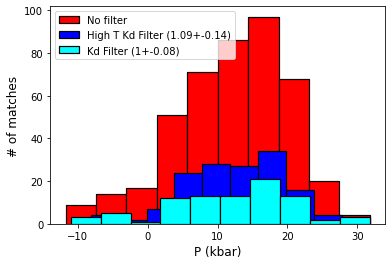

In [14]:
plt.hist(All_matches['P_kbar_calc'], facecolor='r', edgecolor='black', 
         linewidth=1.2, label='No filter')
plt.hist(All_matches_HighTKdFilt['P_kbar_calc'], facecolor='b', edgecolor='black', 
         linewidth=1.2, label='High T Kd Filter (1.09+-0.14)')
plt.hist(All_matches_KdFilt2['P_kbar_calc'], facecolor='cyan', edgecolor='black', 
         linewidth=1.2, label='Kd Filter (1+-0.08)')

plt.xlabel('P (kbar)', fontsize=12)
plt.ylabel('# of matches', fontsize=12)
plt.legend()

## Can save anything to excel....

In [15]:
All_matches.to_excel('AllMatches.xlsx')